
Time taken for computing between_class_variances for different thresholds is  0.03177989996038377
The threshold for binarization  143
610 674

Binarized Text image is


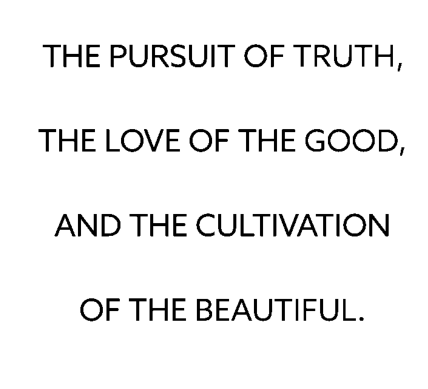

Number of connected components (excluding punctuations): 64


In [3]:
import numpy as np
from PIL import Image 
from timeit import default_timer as timer 
import matplotlib.pyplot as plt
import matplotlib.image as img


def compute_histogram(image, num_bins=256):
    # Initialize an array to store histogram values
    histogram = [0] * num_bins
    
    # Get image dimensions
    width = np.shape(image)[1]
    height = np.shape(image)[0]
    
    # Loop through each pixel and increment the histogram bin
    for y in range(height):
        for x in range(width):
            pixel_value = image[y][x]
            histogram[pixel_value] += 1
    
    return histogram

def calculate_between_class_variance(hist, thresholds):
    start = timer()
    
    total_pixels = np.sum(hist)
    total_mean = np.sum(np.arange(len(hist)) * hist) / total_pixels
    between_class_variances = []

    for t in thresholds:
        class1_pixels = np.sum(hist[:t])
        class2_pixels = total_pixels - class1_pixels

        if class1_pixels == 0 or class2_pixels == 0:
            between_class_variances.append(0)
            continue

        mean1 = np.sum(np.arange(t) * hist[:t]) / class1_pixels
        mean2 = np.sum(np.arange(t, len(hist)) * hist[t:]) / class2_pixels

        between_class_variances.append(((class1_pixels * (mean1 - total_mean)**2) + (class2_pixels * (mean2 - total_mean) ** 2))/total_pixels)
    
    end = timer()
    
    print("\nTime taken for computing between_class_variances for different thresholds is ",end - start)
    
    return between_class_variances

def binarized_image(image, threshold):
    dim1 = np.shape(image)[0]
    dim2 = np.shape(image)[1]
    print(dim1, dim2)
    for i in range(dim1):
        for j in range(dim2):
            if(image[i][j] >= threshold):
                image[i][j] = 255
            else:
                image[i][j] = 0
    print('\nBinarized Text image is')
    plt.gray()
    plt.axis('off')
    plt.imshow(image)
    plt.show()
    
    return image

def find_connected_components(image):
    rows, cols = len(image), len(image[0])
    binarized_image = [[1 if pixel > 127 else 0 for pixel in row] for row in image]
    R = np.empty((rows, cols), dtype=int)  # Initialize R as an integer array
    temp = {}
    k = 0

    for i in range(rows):
        for j in range(cols):
            if binarized_image[i][j] == 1:
                continue
            elif (binarized_image[i][j] == 0 and i != 0 and j != 0):
                if (binarized_image[i][j - 1] == 1 and binarized_image[i - 1][j] == 1):
                    k = k + 1
                    R[i][j] = k
                    temp[k] = [[i, j]]  # Initialize temp[k] as a list containing [i, j]
                else:
                    # Find the label from adjacent pixels
                    left_label = R[i][j - 1]
                    top_label = R[i - 1][j]

                    if binarized_image[i][j-1] == 1 and binarized_image[i-1][j] == 0:
                        R[i][j] = R[i-1][j]
                        temp[R[i][j]].append([i, j])
                    elif binarized_image[i-1][j] == 1 and binarized_image[i][j-1] == 0:
                        R[i][j] = R[i][j-1]
                        temp[R[i][j]].append([i, j])
                    elif binarized_image[i-1][j] == 0 and binarized_image[i][j-1] == 0:
                        R[i][j] = R[i-1][j]
                        
                        # Merge components
                        if (R[i-1][j]!=R[i][j-1]):
                            rays = temp[top_label] 
                            temp[left_label].extend(rays)
                            temp[top_label] = []
                            
                            
    for key in temp.keys():
        for pixel in temp[key]:
            R[pixel[0]][pixel[1]] = key
    

    # Filter components by size
    filtered_temp = {label: pixels for label, pixels in temp.items() if len(pixels) >= 42}
    
    return len(filtered_temp)



def main():
    image = Image.open('quote.png')
    image = np.array(image)
    image_hist = compute_histogram(image, num_bins=256)
    thresholds = np.arange(256)
    between_class_variances = calculate_between_class_variance(image_hist, thresholds)
    binarized_image_threshold = thresholds[np.argmax(between_class_variances)]
    print("The threshold for binarization ",binarized_image_threshold)
    image = binarized_image(image, binarized_image_threshold)
    num_components = find_connected_components(image)
    print(f"Number of connected components (excluding punctuations): {num_components}")
    
    return 1

if __name__ == '__main__':
    main()
